In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiment = Experiment.ghz3

In [3]:
f = open(get_verification_path(experiment))
lines = f.readlines()
f.close()

We are going to get the hardware scenario which has positive probaiblity in most of the synthesized algorithms

In [4]:
scenario_to_count: Dict[Tuple[str, int], int] = dict()
for line in lines[1:]:
    stats_line = StatsFileLine(line, FileType.verification)
    assert stats_line.method == "bellman"
    if stats_line.probability > 0:
        hardware_scenario = (stats_line.hardware, stats_line.embedding_index)
        if hardware_scenario not in scenario_to_count.keys():
            scenario_to_count[hardware_scenario] = 0
        scenario_to_count[hardware_scenario] += 1
    
max_ = -1
for (hardware_scenario, count) in scenario_to_count.items():
    max_ = max(count, max_)
    
for (hardware_scenario, count) in scenario_to_count.items():
    if count == max_:
        print(hardware_scenario, count)
    

('yorktown', 0) 12
('yorktown', 5) 12
('perfect_hardware', 0) 12


In [5]:
hardware = "yorktown"
embedding_index = 5
optimal_algorithm_index = 5
perfect_hardware_algorithm = 8

# Load and filter the DataFrame first
df = pd.read_csv(get_verification_path(experiment))
df = df[(df.hardware == hardware) & (df.embedding_index == embedding_index)]

# Now create the color_category column
def color_by_x(x):
    if x == optimal_algorithm_index:
        return "optimal"
    elif x == perfect_hardware_algorithm:
        return "perfect"
    else:
        return "other"

df['color_category'] = df['algorithm_index'].apply(color_by_x)

# Plot
sns.scatterplot(
    data=df,
    x="algorithm_index",
    y="probability",
    hue="color_category",
    palette={"optimal": "green", "perfect": "red", "other": "blue"},
    legend=False
)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Change x-axis label
plt.xlabel("algorithm index")

plt.savefig("figs/ghz_scatterplot.pdf", dpi=300, bbox_inches='tight')
plt.close() # optional, closes the figure to free memory

Text(0.5, 0, 'algorithm index')

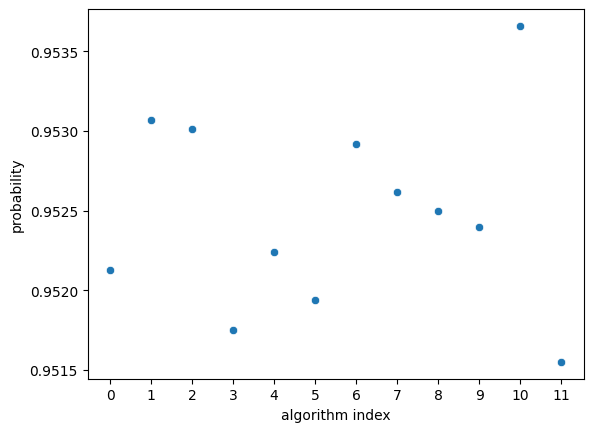

In [6]:
hardware = "yorktown"
embedding_index = 0
df = pd.read_csv(get_verification_path(experiment))
df = df[(df.hardware == hardware) & (df.embedding_index == embedding_index)]
sns.scatterplot(data=df, x="algorithm_index", y="probability", legend=True)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Change x-axis label
plt.xlabel("algorithm index")

In [8]:
embedding_index = 5
df = pd.read_csv(get_verification_path(experiment))
df = df[(df.hardware == hardware) & (df.embedding_index == embedding_index)]
df

,hardware,embedding_index,algorithm_index,probability,method
1191,yorktown,5,0,0.96345,bellman
2384,yorktown,5,1,0.96074,bellman
3577,yorktown,5,2,0.94022,bellman
4770,yorktown,5,3,0.94231,bellman
5963,yorktown,5,4,0.96355,bellman
7156,yorktown,5,5,0.96376,bellman
8349,yorktown,5,6,0.93661,bellman
9542,yorktown,5,7,0.93681,bellman
10735,yorktown,5,8,0.93596,bellman
11928,yorktown,5,9,0.93989,bellman


In [9]:
df.describe()

,embedding_index,algorithm_index,probability
count,12.0,12.000000,12.000000
mean,5.0,5.500000,0.946642
std,0.0,3.605551,0.012136
min,5.0,0.000000,0.935960
25%,5.0,2.750000,0.937560
50%,5.0,5.500000,0.940055
75%,5.0,8.250000,0.961418
max,5.0,11.000000,0.963760
